# Import Libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import graphviz
import warnings
warnings.filterwarnings('ignore')

### Formula of Gini Index $ Gini = 1 - \sum \limits _{i=1} ^{m} (p_{i})^2 $

### Formula for Entropy $ E(S) = \sum \limits _{i=1} ^{c}-p_{i} log_{2} p_{i}$

In [3]:
iris = load_iris()
X = iris.data
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

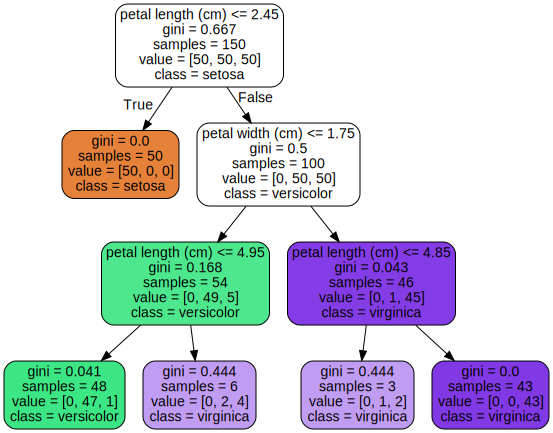

In [4]:
source = export_graphviz(
    tree_clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
graphviz.Source(source)

In [5]:
tree_clf.predict_proba([[5, 1.5, 3, 4]])

array([[0.        , 0.33333333, 0.66666667]])

In [6]:
tree_clf.predict([[5, 1.5, 3, 4]])

array([2])

# Read Data

In [7]:
drug = pd.read_csv('Dataset/drug.csv')

In [8]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [9]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# Data Preprocessing

In [10]:
encoder = LabelEncoder()

In [11]:
sex = encoder.fit_transform(drug['Sex'])

In [12]:
bp = encoder.fit_transform(drug['BP'])

In [13]:
cholesterol = encoder.fit_transform(drug['Cholesterol'])

In [14]:
drug['Sex'] = sex

In [15]:
drug['BP'] = bp

In [16]:
drug['Cholesterol'] = cholesterol

In [17]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


# Data Visulization

<Axes: xlabel='Sex', ylabel='count'>

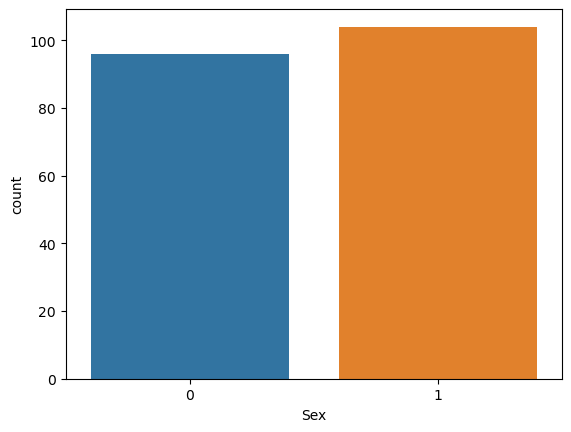

In [18]:
sns.countplot(x=drug['Sex'])

<Axes: xlabel='Age', ylabel='BP'>

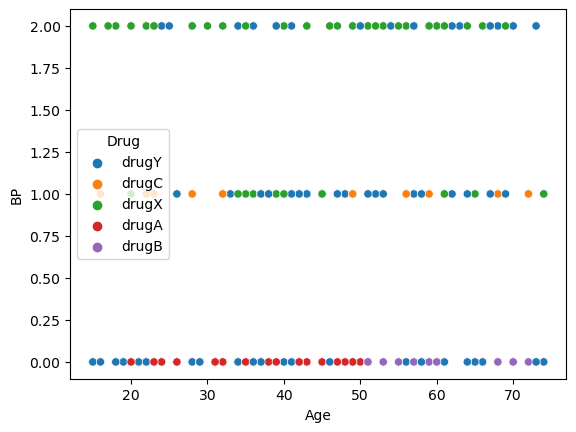

In [19]:
sns.scatterplot(data=drug, x='Age', y='BP', hue='Drug')

<Axes: xlabel='Sex', ylabel='Na_to_K'>

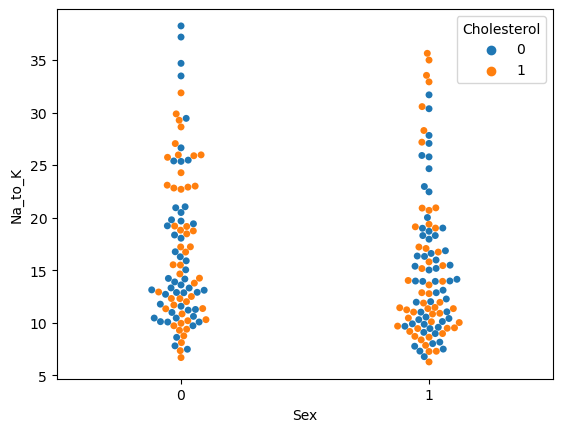

In [20]:
sns.swarmplot(x=drug['Sex'], y=drug['Na_to_K'], hue=drug['Cholesterol'])

# Split Data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(drug.iloc[: , :-1], drug.iloc[: , -1], test_size=.3, random_state=101)

# Creating Model

In [22]:
tree_clf = DecisionTreeClassifier()

In [23]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
predicitions = tree_clf.predict(X_test)

# Model Evaluation

In [25]:
print(confusion_matrix(y_test, predicitions))

[[ 6  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0 12  1]
 [ 0  0  0  0 26]]


In [26]:
print(classification_report(y_test, predicitions))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.92      0.96        13
       drugY       0.96      1.00      0.98        26

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.99        60
weighted avg       0.98      0.98      0.98        60



# Visualization of Decision Tree

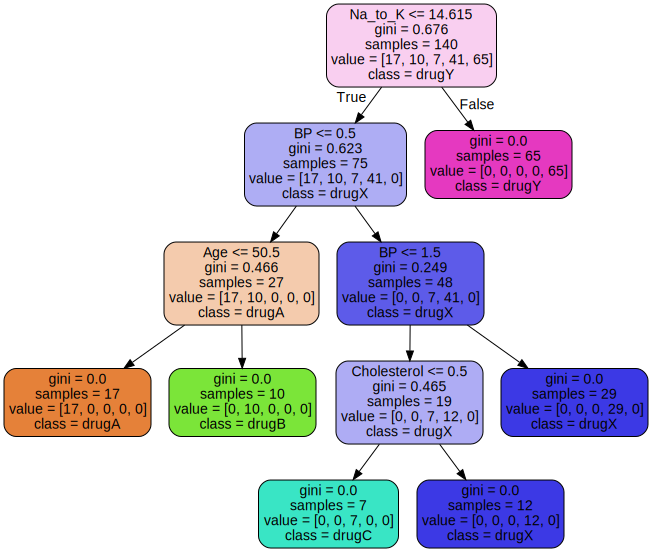

In [27]:
source = export_graphviz(
    tree_clf,
    feature_names=X_train.columns,
    class_names=np.unique(y_train.values),
    rounded=True,
    filled=True
)
graphviz.Source(source)